# S13 T01: Classifica els diferents vols

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics 

%matplotlib inline
pd.set_option('display.max_columns', None)


## Exercise 1


Classify the different flights using the K-means algorithm

In [2]:
dataset= pd.read_csv('DelayedFlights2.csv')

In [3]:
# Small database to shorten computation time for the sole purpose of trying different models

df=dataset.sample(500, random_state=42)

In [4]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,6583804,2008,12,6,6,1805.0,1755,2146.0,2035,YV,7281,N505MJ,281.0,220.0,177.0,71.0,10.0,IAD,AUS,1297,5.0,99.0,0,N,0,71.0,0.0,0.0,0.0,0.0
512712,1604365,2008,3,23,7,2120.0,1200,2241.0,1333,NW,131,N777NC,81.0,93.0,55.0,548.0,560.0,ORD,MSP,334,7.0,19.0,0,N,0,543.0,0.0,0.0,0.0,5.0
447137,1395655,2008,3,31,1,1731.0,1710,1819.0,1810,OO,3676,N224SW,48.0,60.0,44.0,9.0,21.0,SLC,PIH,150,3.0,1.0,0,N,0,NaN,NaN,NaN,NaN,NaN
55082,178786,2008,1,6,7,1507.0,1413,1601.0,1509,OO,6573,N708SK,54.0,56.0,32.0,52.0,54.0,HDN,DEN,142,5.0,17.0,0,N,0,0.0,0.0,0.0,0.0,52.0
877634,2972767,2008,5,22,4,637.0,630,812.0,750,CO,1869,N16646,155.0,140.0,134.0,22.0,7.0,JAX,IAH,817,5.0,16.0,0,N,0,0.0,0.0,15.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896383,6901686,2008,12,19,5,743.0,715,901.0,825,AA,407,N4XDAA,78.0,70.0,49.0,36.0,28.0,ORD,STL,258,3.0,26.0,0,N,0,0.0,28.0,8.0,0.0,0.0
831537,2798661,2008,5,11,7,1639.0,1545,1645.0,1605,MQ,4292,N670AE,66.0,80.0,51.0,40.0,54.0,CMH,ORD,296,7.0,8.0,0,N,0,0.0,0.0,38.0,0.0,2.0
1351300,4558495,2008,8,14,4,1220.0,1214,1445.0,1436,EV,4219,N972EV,85.0,82.0,62.0,9.0,6.0,JAN,ATL,341,13.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
837753,2824724,2008,5,9,5,1411.0,1345,1607.0,1548,NW,663,N345NW,116.0,123.0,104.0,19.0,26.0,MEM,MSP,700,2.0,10.0,0,N,0,19.0,0.0,0.0,0.0,0.0


In [5]:
# Dropping some unnecessary columns

var= ['Unnamed: 0', 'Year', 'TailNum']

In [6]:
df=df.drop(columns=var)

In [7]:
# Checking for Nan

df.isna().sum()

Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                2
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
ActualElapsedTime      3
CRSElapsedTime         0
AirTime                3
ArrDelay               3
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 2
TaxiOut                0
Cancelled              0
CancellationCode       0
Diverted               0
CarrierDelay         167
WeatherDelay         167
NASDelay             167
SecurityDelay        167
LateAircraftDelay    167
dtype: int64

In [8]:
# Interpolating ArrDelay with median

df['ArrDelay']=df['ArrDelay'].fillna(df['ArrDelay'].median())

In [9]:
# Creating another column ArrDelay with binary data

df.loc[df['ArrDelay'] <= 0, 'ArrDelay_bin'] = 0
df.loc[df['ArrDelay']> 0, 'ArrDelay_bin'] = 1

In [10]:
# Checking column names

df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'ArrDelay_bin'],
      dtype='object')

In [11]:
# Filling Nan with median

fill=[ 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrTime', 'ArrDelay','TaxiIn','TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'] 

In [12]:
df[fill]=df[fill].fillna(df[fill].median())

In [13]:
# Changing new column to integer

df['ArrDelay_bin']=df['ArrDelay_bin'].astype('int')

In [14]:
# Checking dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1782417 to 1650130
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              500 non-null    int64  
 1   DayofMonth         500 non-null    int64  
 2   DayOfWeek          500 non-null    int64  
 3   DepTime            500 non-null    float64
 4   CRSDepTime         500 non-null    int64  
 5   ArrTime            500 non-null    float64
 6   CRSArrTime         500 non-null    int64  
 7   UniqueCarrier      500 non-null    object 
 8   FlightNum          500 non-null    int64  
 9   ActualElapsedTime  500 non-null    float64
 10  CRSElapsedTime     500 non-null    float64
 11  AirTime            500 non-null    float64
 12  ArrDelay           500 non-null    float64
 13  DepDelay           500 non-null    float64
 14  Origin             500 non-null    object 
 15  Dest               500 non-null    object 
 16  Distance        

In [15]:
# Creating a copy of the dataset

df2=df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1782417 to 1650130
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              500 non-null    int64  
 1   DayofMonth         500 non-null    int64  
 2   DayOfWeek          500 non-null    int64  
 3   DepTime            500 non-null    float64
 4   CRSDepTime         500 non-null    int64  
 5   ArrTime            500 non-null    float64
 6   CRSArrTime         500 non-null    int64  
 7   UniqueCarrier      500 non-null    object 
 8   FlightNum          500 non-null    int64  
 9   ActualElapsedTime  500 non-null    float64
 10  CRSElapsedTime     500 non-null    float64
 11  AirTime            500 non-null    float64
 12  ArrDelay           500 non-null    float64
 13  DepDelay           500 non-null    float64
 14  Origin             500 non-null    object 
 15  Dest               500 non-null    object 
 16  Distance        

In [19]:
# Variables to modifie

cat= ['UniqueCarrier','Origin','Dest','CancellationCode', 'FlightNum']
num= ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime',  'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']



In [145]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

In [21]:
# Creating instance of Labelencoder to transform categorical data

le = LabelEncoder()

In [22]:
df2[cat]=df2[cat].apply(LabelEncoder().fit_transform)

In [23]:
df2[cat]

,UniqueCarrier,Origin,Dest,CancellationCode,FlightNum
1782417,18,53,9,0,464
512712,11,84,83,0,32
447137,13,110,97,0,351
55082,13,46,34,0,448
877634,4,58,55,0,256
...,...,...,...,...,...
1896383,1,84,114,0,81
831537,10,25,90,0,377
1351300,6,57,8,0,374
837753,11,71,83,0,120


In [24]:
df2[cat]=df2[cat].astype('category')

In [25]:
# Scaling the data so that all the features become comparable

scaler = StandardScaler()
scaler.fit(df2[num])

#scale selected data
df2[num] = scaler.transform(df2[num])

In [149]:
df2

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_bin
1782417,1.685677,-1.098914,1.020770,0.617517,0.657043,0.935743,0.856737,18,464,2.032753,1.204133,1.042086,0.390125,-0.646500,53,9,0.954706,-0.384999,4.343123,0.0,0,-0.077693,1.415844,-0.167717,-0.415307,-0.066963,-0.620296,1
512712,-0.901481,0.825430,1.517253,1.298531,-0.646996,1.120599,-0.738871,11,32,-0.723298,-0.573484,-0.773551,8.234073,9.034807,84,83,-0.737319,-0.025187,-0.030947,0.0,0,-0.077693,12.810575,-0.167717,-0.415307,-0.066963,-0.476855,1
447137,-0.901481,1.731004,-1.461647,0.457533,0.551310,0.299451,0.345324,13,351,-1.178046,-1.035385,-0.937255,-0.629423,-0.452874,110,97,-1.060613,-0.744812,-1.015112,0.0,0,-0.077693,-0.298194,-0.167717,-0.295829,-0.066963,-0.333414,1
55082,-1.476404,-1.098914,1.517253,-0.026743,-0.146527,-0.124745,-0.338833,13,448,-1.095365,-1.091373,-1.115843,0.077683,0.128004,46,34,-1.074669,-0.384999,-0.140298,0.0,0,-0.077693,-0.298194,-0.167717,-0.415307,-0.066963,0.871490,1
877634,-0.326557,0.712234,0.027803,-1.907639,-1.986280,-1.660020,-2.063999,4,256,0.296441,0.084374,0.402149,-0.415647,-0.699307,58,55,0.111329,-0.384999,-0.194974,0.0,0,-0.077693,-0.298194,-0.167717,0.032737,2.453143,-0.620296,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896383,1.685677,0.372644,0.524287,-1.678472,-1.786563,-1.486839,-1.893528,1,81,-0.764639,-0.895415,-0.862844,-0.185426,-0.329657,84,114,-0.870853,-0.744812,0.351785,0.0,0,-0.077693,-0.298194,1.731991,-0.176350,-0.066963,-0.620296,1
831537,-0.326557,-0.532930,1.517253,0.258634,0.163623,-0.039127,-0.120630,10,377,-0.930002,-0.755445,-0.833080,-0.119649,0.128004,25,90,-0.804086,-0.025187,-0.632381,0.0,0,-0.077693,-0.298194,-0.167717,0.719739,-0.066963,-0.562920,1
1351300,0.535829,-0.193340,0.027803,-0.647223,-0.614102,-0.428297,-0.504758,6,374,-0.668177,-0.727451,-0.669375,-0.629423,-0.716910,57,8,-0.725019,1.054250,-0.523029,0.0,0,-0.077693,-0.298194,-0.167717,-0.295829,-0.066963,-0.333414,1
837753,-0.326557,-0.759323,0.524287,-0.234290,-0.306301,-0.113069,-0.250188,11,120,-0.240989,-0.153575,-0.044319,-0.464980,-0.364862,71,83,-0.094244,-0.924718,-0.523029,0.0,0,-0.077693,0.160492,-0.167717,-0.415307,-0.066963,-0.620296,1


In [152]:
# Normalising data to transforme it closer to Gaussian distribution

normalised= normalize(df2)

In [153]:
normalised

array([[ 3.60579138e-03, -2.35066009e-03,  2.18350502e-03, ...,
        -1.43238550e-04, -1.32686156e-03,  2.13907646e-03],
       [-7.26087884e-03,  6.64834009e-03,  1.22205552e-02, ...,
        -5.39344704e-04, -3.84078086e-03,  8.05439289e-03],
       [-2.36827272e-03,  4.54750703e-03, -3.83988232e-03, ...,
        -1.75917458e-04, -8.75910323e-04,  2.62709231e-03],
       ...,
       [ 1.41581337e-03, -5.10859410e-04,  7.34636626e-05, ...,
        -1.76934850e-04, -8.80976018e-04,  2.64228570e-03],
       [-2.00771333e-03, -4.66841929e-03,  3.22338172e-03, ...,
        -4.11696005e-04, -3.81366330e-03,  6.14813004e-03],
       [ 4.79207373e-03, -2.60241414e-03,  5.20005246e-03, ...,
        -2.29500274e-04, -1.14270443e-03,  0.00000000e+00]])

In [155]:
# Converting the numpy array into a pandas DataFrame

df2_ = pd.DataFrame(normalised)

In [157]:
df2_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.003606,-0.002351,0.002184,0.001321,0.001405,0.002002,0.001833,0.038503,0.992531,0.004348,0.002576,0.002229,0.000835,-0.001383,0.113371,0.019252,0.002042,-0.000824,0.009290,0.0,0.0,-0.000166,0.003029,-0.000359,-0.000888,-0.000143,-0.001327,0.002139
1,-0.007261,0.006648,0.012221,0.010459,-0.005211,0.009026,-0.005951,0.088598,0.257741,-0.005826,-0.004619,-0.006230,0.066320,0.072770,0.676569,0.668515,-0.005939,-0.000203,-0.000249,0.0,0.0,-0.000626,0.103181,-0.001351,-0.003345,-0.000539,-0.003841,0.008054
2,-0.002368,0.004548,-0.003840,0.001202,0.001448,0.000787,0.000907,0.034152,0.922109,-0.003095,-0.002720,-0.002462,-0.001654,-0.001190,0.288980,0.254828,-0.002786,-0.001957,-0.002667,0.0,0.0,-0.000204,-0.000783,-0.000441,-0.000777,-0.000176,-0.000876,0.002627
3,-0.003268,-0.002432,0.003358,-0.000059,-0.000324,-0.000276,-0.000750,0.028771,0.991505,-0.002424,-0.002415,-0.002470,0.000172,0.000283,0.101806,0.075248,-0.002378,-0.000852,-0.000311,0.0,0.0,-0.000172,-0.000660,-0.000371,-0.000919,-0.000148,0.001929,0.002213
4,-0.001217,0.002655,0.000104,-0.007111,-0.007404,-0.006188,-0.007694,0.014911,0.954289,0.001105,0.000315,0.001499,-0.001549,-0.002607,0.216206,0.205023,0.000415,-0.001435,-0.000727,0.0,0.0,-0.000290,-0.001112,-0.000625,0.000122,0.009145,-0.002312,0.003728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.010328,0.002283,0.003212,-0.010284,-0.010946,-0.009110,-0.011602,0.006127,0.496295,-0.004685,-0.005486,-0.005287,-0.001136,-0.002020,0.514676,0.698489,-0.005336,-0.004564,0.002155,0.0,0.0,-0.000476,-0.001827,0.010612,-0.001081,-0.000410,-0.003801,0.006127
496,-0.000840,-0.001372,0.003905,0.000666,0.000421,-0.000101,-0.000310,0.025737,0.970303,-0.002394,-0.001944,-0.002144,-0.000308,0.000329,0.064344,0.231637,-0.002070,-0.000065,-0.001628,0.0,0.0,-0.000200,-0.000767,-0.000432,0.001852,-0.000172,-0.001449,0.002574
497,0.001416,-0.000511,0.000073,-0.001710,-0.001623,-0.001132,-0.001334,0.015854,0.988215,-0.001766,-0.001922,-0.001769,-0.001663,-0.001894,0.150610,0.021138,-0.001916,0.002786,-0.001382,0.0,0.0,-0.000205,-0.000788,-0.000443,-0.000782,-0.000177,-0.000881,0.002642
498,-0.002008,-0.004668,0.003223,-0.001440,-0.001883,-0.000695,-0.001538,0.067629,0.737776,-0.001482,-0.000944,-0.000272,-0.002859,-0.002243,0.436517,0.510295,-0.000579,-0.005685,-0.003216,0.0,0.0,-0.000478,0.000987,-0.001031,-0.002553,-0.000412,-0.003814,0.006148


In [158]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline

In [159]:
# Applying Principal component analysis (PCA) to data to reduce dimensionality

pca = PCA(n_components=2)

In [160]:
principalComponents = pca.fit_transform(df2_)

In [161]:
df3 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [162]:
df3

,principal component 1,principal component 2
0,-0.361879,0.037995
1,0.765392,0.118096
2,-0.101051,0.039213
3,-0.333711,-0.004949
4,-0.184184,0.009692
...,...,...
495,0.546249,-0.036453
496,-0.242784,-0.128018
497,-0.343620,0.066376
498,0.240359,0.009241


In [226]:
# Applying K-Means clustering algorithm

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df3)

In [227]:
# The lowest SSE value

kmeans.inertia_

23.33462787721436

In [228]:
# Final locations of the centroid

kmeans.cluster_centers_

array([[-0.18865861, -0.00720454],
       [ 0.59881149, -0.20876179],
       [ 0.38790608,  0.2532554 ]])

In [229]:
# The number of iterations required to converge

kmeans.n_iter_

8

In [230]:
# Clustering prediction

kmeans.labels_[:10]

array([0, 1, 0, 0, 0, 0, 1, 2, 0, 0])

In [231]:
pred_y

array([0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0,

In [232]:
# Checking size

z = len(pred_y)
z

500

In [233]:
# Creating a new dataframe

clus =pd.DataFrame(data= pred_y, columns = ['clusters'])
clus

,clusters
0,0
1,1
2,0
3,0
4,0
...,...
495,1
496,0
497,0
498,2


In [234]:
df4=pd.concat([df3, clus], axis=1)
df4

,principal component 1,principal component 2,clusters
0,-0.361879,0.037995,0
1,0.765392,0.118096,1
2,-0.101051,0.039213,0
3,-0.333711,-0.004949,0
4,-0.184184,0.009692,0
...,...,...,...
495,0.546249,-0.036453,1
496,-0.242784,-0.128018,0
497,-0.343620,0.066376,0
498,0.240359,0.009241,2


In [235]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  500 non-null    float64
 1   principal component 2  500 non-null    float64
 2   clusters               500 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.9 KB


In [236]:
import seaborn as sns

Text(0.5, 1.0, 'Two clusters with KMeans algorithm')

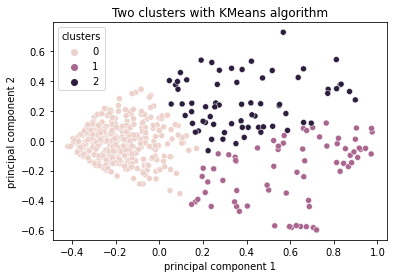

In [237]:
# Creating a scatterplot to visualise clustering

sns.scatterplot(data=df4, x="principal component 1", y="principal component 2", hue="clusters")
plt.title("Two clusters with KMeans algorithm") 


In [203]:
silhouette_score(df4[["principal component 1","principal component 2"]], df4.clusters)

0.6070515844107963

### Choosing the Appropriate Number of Clusters

In [176]:
from kneed import  KneeLocator

In [187]:
# Applying KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

According to this algorithm the best number of clusters is 3. Latter on we will check the silhouette score for different numbers of clusters.

## Exercise 2

Classify the different flights using hierarchical clustering.

In [180]:
import scipy.cluster.hierarchy as shc


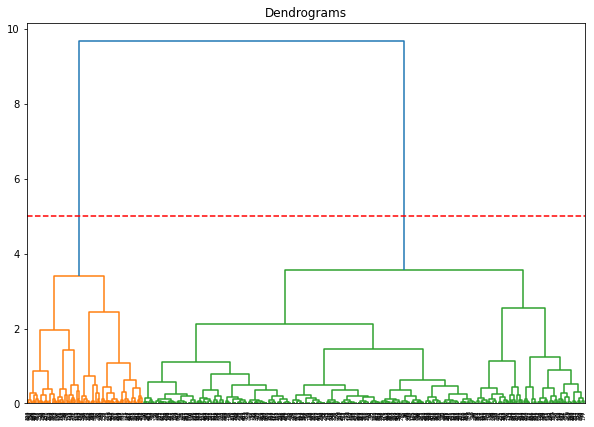

In [207]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df3, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

According to the dendograms, there are clearly two clusters, but one third clusters is clearly visible.

In [219]:
from sklearn.cluster import AgglomerativeClustering


In [209]:
# Applying Agglomerative Clustering algorithm

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df3)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

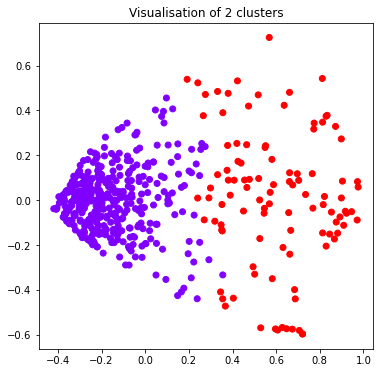

In [238]:
# Visualisation of 2 clusters

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df3['principal component 1'], df3['principal component 2'], 
           c = ac2.fit_predict(df3), cmap ='rainbow')
plt.title("Visualisation of 2 clusters")  
plt.show()

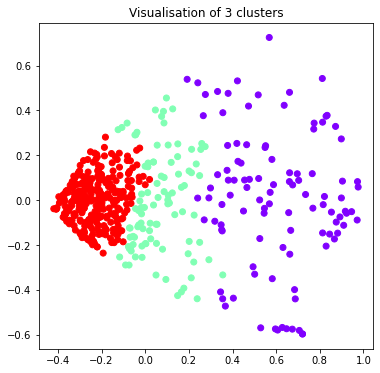

In [239]:
# Visualisation of 3 clusters

ac3 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df3['principal component 1'], df3['principal component 2'], 
           c = ac3.fit_predict(df3), cmap ='rainbow')
plt.title("Visualisation of 3 clusters") 
plt.show()

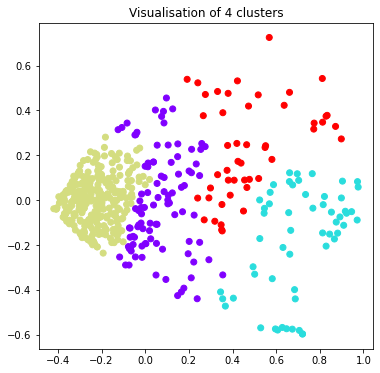

In [240]:
# Visualisation of 4 clusters

ac4 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df3['principal component 1'], df3['principal component 2'], 
           c = ac4.fit_predict(df3), cmap ='rainbow')
plt.title("Visualisation of 4 clusters") 
plt.show()

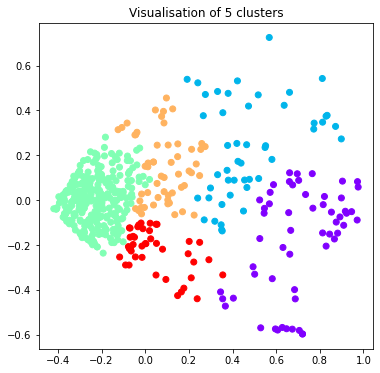

In [241]:
# Visualisation of 5 clusters

ac5 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df3['principal component 1'], df3['principal component 2'], 
           c = ac5.fit_predict(df3), cmap ='rainbow')
plt.title("Visualisation of 5 clusters") 
plt.show()

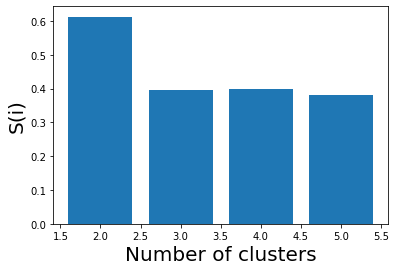

In [242]:
# Appending the silhouette scores of the different models to the list

k = [2, 3, 4, 5]


silhouette_scores = []
silhouette_scores.append(
silhouette_score(df3, ac2.fit_predict(df3)))
silhouette_scores.append(
silhouette_score(df3, ac3.fit_predict(df3)))
silhouette_scores.append(
silhouette_score(df3, ac4.fit_predict(df3)))
silhouette_scores.append(
silhouette_score(df3, ac5.fit_predict(df3)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


## Excercise 3 

Calculate the performance of clustering using a parameter such as silhouette.

### Sillhouette socores wiht KMeans

In [ ]:
range_n_clusters = list (range(2,10))

In [222]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    preds = clusterer.fit_predict(df3)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df3, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6070515844107963)
For n_clusters = 3, silhouette score is 0.5591315785133912)
For n_clusters = 4, silhouette score is 0.48351925390977524)
For n_clusters = 5, silhouette score is 0.36025191613978086)
For n_clusters = 6, silhouette score is 0.36904148951164567)
For n_clusters = 7, silhouette score is 0.38110501336637775)
For n_clusters = 8, silhouette score is 0.37110311852307865)
For n_clusters = 9, silhouette score is 0.38104867312962415)


### Sillhouette socores wiht AgglomerativeClustering

In [224]:
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df3)
    

    score = silhouette_score(df3, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6128976249954614)
For n_clusters = 3, silhouette score is 0.3961572754693999)
For n_clusters = 4, silhouette score is 0.3984455886894673)
For n_clusters = 5, silhouette score is 0.3811363545718726)
For n_clusters = 6, silhouette score is 0.39436991221037976)
For n_clusters = 7, silhouette score is 0.3111726368614064)
For n_clusters = 8, silhouette score is 0.3231614965433199)
For n_clusters = 9, silhouette score is 0.3136363653369068)


The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

For clusters 2,3,4 KMeans performes better.